# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, probplot, ttest_1samp, anderson
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


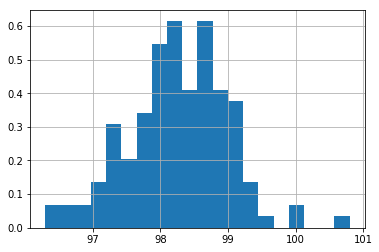

In [23]:
# Your work here.
df.temperature.hist(density=True, bins=20)

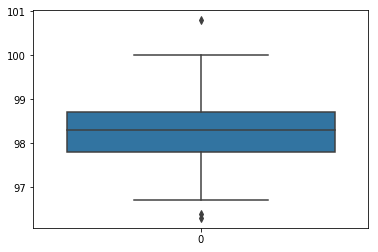

In [24]:
sns.boxplot(data=df.temperature)

In [25]:
sample_mean, sample_std = norm.fit(df.temperature)
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


## 1. Is the distribution normal?
First, I plot a histogram of the data with the standard normal distrubution with the sample mean and variance overlayed for comparison.  Then, I show a normal probability plot.  Both plots show visual evidence that the distrubution is approximately normal.

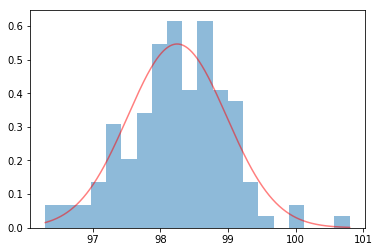

In [26]:
fig, ax = plt.subplots()
ax.hist(df.temperature, density=True, bins=20, alpha=0.5)
x = np.linspace(min(df.temperature), max(df.temperature), 1000)
ax.plot(x, norm.pdf(x, sample_mean, sample_std), color='red', alpha=0.5, label='normal')
plt.show()

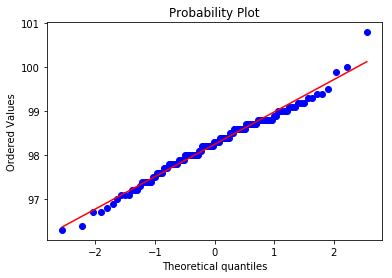

In [27]:
fig, ax = plt.subplots()
probplot(df.temperature, plot=ax)
plt.show()

Next, I will perform the Anderson-Darling test for normality with a significance level of $\alpha = 0.05$ and the following hypotheses:

- H<sub>0</sub>: The data are normally distributed <br>
- H<sub>a</sub>: The data are not normally distributed

This function is based on the information found __[here](https://www.spcforexcel.com/knowledge/basic-statistics/anderson-darling-test-for-normality)__.


In [28]:
def anderson_darling(data):
    """Returns a p-value based on the Anderson-Darling test for normality"""
    data = sorted(data)
    mu = np.mean(data)
    sigma = np.std(data)
    n = len(data)
    data_stand = (data - mu) / sigma
    A2 = 0
    for i, (item,rev_item) in enumerate(zip(data_stand, reversed(data_stand))):
        A2 -= (2*i + 1) * (np.log(norm.cdf(item)) + np.log(1 - norm.cdf(rev_item)))
    A2 = (A2 / n) - n
    A2 *= 1 + 4/n - 25/(n**2)
    if A2 >= 0.6:
        p = np.exp(1.2937 - 5.709*(A2) + 0.0186*(AD2)**2)
    elif A2 >= 0.34:
        p = np.exp(0.9177 - 4.279*(A2) - 1.38*(A2)**2)
    elif A2 > 0.2:
        p = 1 - np.exp(-8.318 + 42.796*(A2)- 59.938*(A2)**2)
    elif A2 <= 0.2:
        p = 1 - np.exp(-13.436 + 101.14*(A2)- 223.73*(A2)**2)
    else:
        p = None
    return p

In [29]:
print('p = ' + str(anderson_darling(np.array(df.temperature))))

p = 0.17935165296394442


Since $p > 0.05$, we fail to reject $H_0$ and obtain more evidence that the temperature data is normally distributed.

The stats library also has an implementation of the anderson-darling test:

In [30]:
print(anderson(df.temperature))

AndersonResult(statistic=0.5201038826714921, critical_values=array([0.56 , 0.637, 0.765, 0.892, 1.061]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


Since the statistic is less than the critical value for 5% significance, this test also fails to reject the null hypothesis and 

## 2. Is the sample size large?  Are the observations independent?
Yes, the sample size is large ($n=130 >> 30$).  The observations are also independent since $n$ is much smaller than the size of the population, and there should not be any relation between random peoples' body temperatures.

## 3. Is the true population mean really 98.6 degrees F?
- First, try a bootstrap hypothesis test.
- Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
- In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
- Now try using the other test. How is the result be different? Why?

In [31]:
def bs_mean_samples(data, size=100):
    return [np.mean(np.random.choice(data, len(data))) for _ in range(size)]

In [32]:
print(np.percentile(bs_mean_samples(df.temperature, size=10000), [0.5,99.5]))

[98.08076154 98.41538846]


A t test would have $df = 129$, so there will not be much difference between a z and t test.  In any case, I will perform the test with a significance level of $alpha = 0.01$ and the hypotheses:
>$H_0: \mu = 98.6$ <br>
>$H_a: \mu < 98.6$ <br>

The test statistic is:

In [33]:
t = (sample_mean - 98.6) / (sample_std / np.sqrt(len(df.temperature)))
print('t = ' + str(t))

t = -5.4759252020785585


This gives a miniscule p-value for either the z or t test, so we reject the null hypothesis.

scipy.stats also has a function for doing 1 sample t tests, which gives a similar test statistic and very small p-value.

In [34]:
print('test statistic: ' + str(ttest_1samp(df.temperature, 98.6).statistic))
print('p-value: ' + str(ttest_1samp(df.temperature, 98.6).pvalue/2)) # div by 2 for 1 tailed p-value

test statistic: -5.4548232923645195
p-value: 1.2053160207780638e-07


## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
- Which one is the correct one to use?
- What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

Now, since the sample size will be small, a z test will be overly susceptible to type I errors, and a t test should be used.

In [41]:
small_sample = np.array(np.random.choice(df.temperature, 10))
print('test statistic: ' + str(ttest_1samp(small_sample, 98.6).statistic))
print('p-value: ' + str(ttest_1samp(small_sample, 98.6).pvalue/2)) # div by 2 for 1 tailed p-value

test statistic: -0.6850544495798835
p-value: 0.2552829934955334


Using the test statistic from above (-0.685) and a z table, I find a p-value of ~.16.  In this case, both tests fail to reject the null hypothesis.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
- Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

The "normal" range could be considered to be the 95% confidence interval based on this sample.  Using the bootstrap approach, this is just the 95% confidence interval of the sample itself:

In [15]:
print(np.percentile(df.temperature, [2.5,97.5]))

[96.7225 99.4775]


Using the frequentist approach, this is:

In [16]:
print([sample_mean - 1.96*sample_std, sample_mean + 1.96*sample_std])

[96.81772952257687, 99.68073201588463]


## 6. Is there a significant difference between males and females in normal temperature?
- What testing approach did you use and why?
- Write a story with your conclusion in the context of the original problem.

In [17]:
male_temp = df[df['gender'] == 'M'].temperature.values
fem_temp = df[df['gender'] == 'F'].temperature.values
male_mean = np.mean(male_temp)
fem_mean = np.mean(fem_temp)
male_std = np.std(male_temp)
fem_std = np.std(fem_temp)
N_male = len(male_temp)
N_fem = len(fem_temp)
print('N_male: ' + str(N_male))
print('N_female: ' + str(N_fem))

N_male: 65
N_female: 65


In [18]:
t = (male_mean - fem_mean) / (np.sqrt((male_std**2/N_male) + (fem_std**2/N_fem)))
df = ((male_std**2/N_male) + (fem_std**2/N_fem))**2 / (((male_std**2/N_male)**2 / (N_male-1)) + ((fem_std**2/N_fem)**2 / (N_fem-1)))
print(t, int(df))

-2.3032202891943516 127


Since the number of degrees of freedom is fairly large, I will do a z test with significance level $alpha = 0.01$ and the hypotheses:

>$H_0: \mu_{male} - \mu_{female} = 0$ <br>
>$H_a: \mu_{male} - \mu_{female} \ne 0$ <br>

Using a z* of -2.30 and a z-table, I find the two-tailed p-value of 0.0214, and fail to reject the null hypothesis at the chosen significance level.  This result suggests that there may be a difference in body temperatures between genders, but more data would be needed for 99% confidence.  I get similar results from the scipy.stats t-test:

In [19]:
print(ttest_1samp(male_temp - fem_temp, 0))

Ttest_1sampResult(statistic=-2.2415178256185277, pvalue=0.028467550912064203)
